In [1]:
# By Anita Ahmed, CUSP, 2/2017
import numpy as np
import csv
import matplotlib.pyplot as plt
import numpy as np
#from scipy import fftpack
import statsmodels.api as sm  
from scipy import polyfit, polyval
%matplotlib inline

In [2]:
# Function to clean up erroneous inputs and convert to integers
def convert(string):
    return int(string.replace("$","").replace(",","").strip().replace(".00","").replace("-","0"))

In [3]:
# Reading everything to a list of lists, each sublist is a yearly data in proper order
data = []
for name in map(lambda x: str(x)+"_manhattan.csv", range(2003, 2017)):
    with open(name, 'rb') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        next(reader, None)
        data.append(map(lambda x: [x[1], x[8], convert(x[15]), convert(x[16]), convert(x[19]),
                                   int(x[-1].split('/')[0])], reader))

In [4]:
means = np.mean(map(lambda dat: np.mean(map(lambda d: d[-2], dat)), data))
stds =  np.mean(map(lambda dat: np.std(map(lambda d: d[-2], dat)), data))

In [5]:
# Filtering out unreasonable prices <10000
data = map(lambda x: filter(lambda y: y[-2]>10000 and y[-2]<means + 3*stds, x), data)

In [6]:
# Printing samples from the list
for i in range(0, 14):
    print data[i][0]

['ALPHABET CITY            ', ' 746 EAST 6 STREET                         ', 3542, 1899, 1800000, 1]
['ALPHABET CITY            ', ' 317 EAST 8 STREET                         ', 4288, 1915, 1315750, 1]
['ALPHABET CITY            ', ' 111 AVENUE C                              ', 3847, 1901, 2675000, 2]
['ALPHABET CITY            ', ' 219 E 3                                   ', 775, 1920, 340000, 9]
['ALPHABET CITY            ', ' 525 EAST 12TH   STREET                    ', 0, 0, 2600000, 1]
['ALPHABET CITY            ', ' 96 AVENUE B                               ', 1839, 1901, 20000, 12]
['ALPHABET CITY            ', ' 292 EAST THIRD STREET                     ', 6920, 1920, 670509, 5]
['ALPHABET CITY            ', ' 15 AVENUE D                               ', 2240, 1910, 593362, 4]
['ALPHABET CITY            ', ' 316 EAST 3RD   STREET                     ', 2700, 1900, 3500000, 9]
['ALPHABET CITY            ', ' 715 EAST 5TH   STREET                     ', 9345, 1900, 3650000, 9]
[

In [7]:
# Extracting Chelsea
manhattan = map(lambda x: filter(lambda y: "CHELSEA" in y[0], x), data)
highline = map(lambda x: filter(lambda y: (y[1]).strip()[0] == '4' or (y[1]).strip()[0] == '5', x), manhattan)

### Simple averaging approach. Should be improved into linear regression over different parameters

In [8]:
# Selecting prices and months
manhattan_ = map(lambda x: map(lambda y: y[-2:], x), manhattan)
highline_ = map(lambda x: map(lambda y: y[-2:], x), highline)

In [9]:
for i in range(0, 14):
    print highline_[i][0]

[1850000, 10]
[2525000, 2]
[4250000, 8]
[4250000, 3]
[4400000, 9]
[4388888, 9]
[995000, 5]
[1306213, 1]
[4300000, 1]
[28358, 11]
[8500000, 8]
[4000000, 2]
[7732344, 1]
[13000000, 8]


In [10]:
# Aggregating prices by month 
manhattanmedian = sum(map(lambda q: map(lambda z: np.median(map(lambda y: y[0], filter(lambda x: x[1] == z, q)))/1000, 
                                 range(1, 13)), manhattan_), [])
highlinemedian = sum(map(lambda q: map(lambda z: np.median(map(lambda y: y[0], filter(lambda x: x[1] == z, q)))/1000,
                                    range(1, 13)), highline_), [])
manhattanmean = sum(map(lambda q: map(lambda z: np.mean(map(lambda y: y[0], filter(lambda x: x[1] == z, q)))/1000, 
                                 range(1, 13)), manhattan_), [])
highlinemean = sum(map(lambda q: map(lambda z: np.mean(map(lambda y: y[0], filter(lambda x: x[1] == z, q)))/1000,
                                    range(1, 13)), highline_), [])

In [11]:
# Generating dates for the period
dates = sum(map(lambda y: map(lambda x: str(x)+"/"+str(y), range(1, 13)), range(2003, 2017)), [])

In [12]:
#mean sales price post pre-highline for chelsea
np.mean(highlinemean[:77])

1742.2383955378689

In [13]:
#mean sales price post-higline for chelsea
np.mean(highlinemean[77:])

2558.3781040854428

In [14]:
#median sales price post pre-highline for chelsea
np.mean(highlinemedian[:77])

814.63633116883125

In [15]:
#median sales price post post-highline for chelsea
np.mean(highlinemedian[77:])

1384.0657912087911

In [16]:
#mean sales price post pre-highline for manhattan
np.mean(manhattanmean[:77])

1528.8309802873041

In [17]:
#mean sales price post post-highline for manhattan
np.mean(manhattanmean[77:])

2318.2690755742674

In [18]:
#median sales price post pre-highline for manhattan
np.mean(manhattanmedian[:77])

837.26274675324669

In [19]:
#median sales price post pre-highline for manhattan
np.mean(manhattanmedian[77:])

1176.1835989010988

# Trend

## Mean

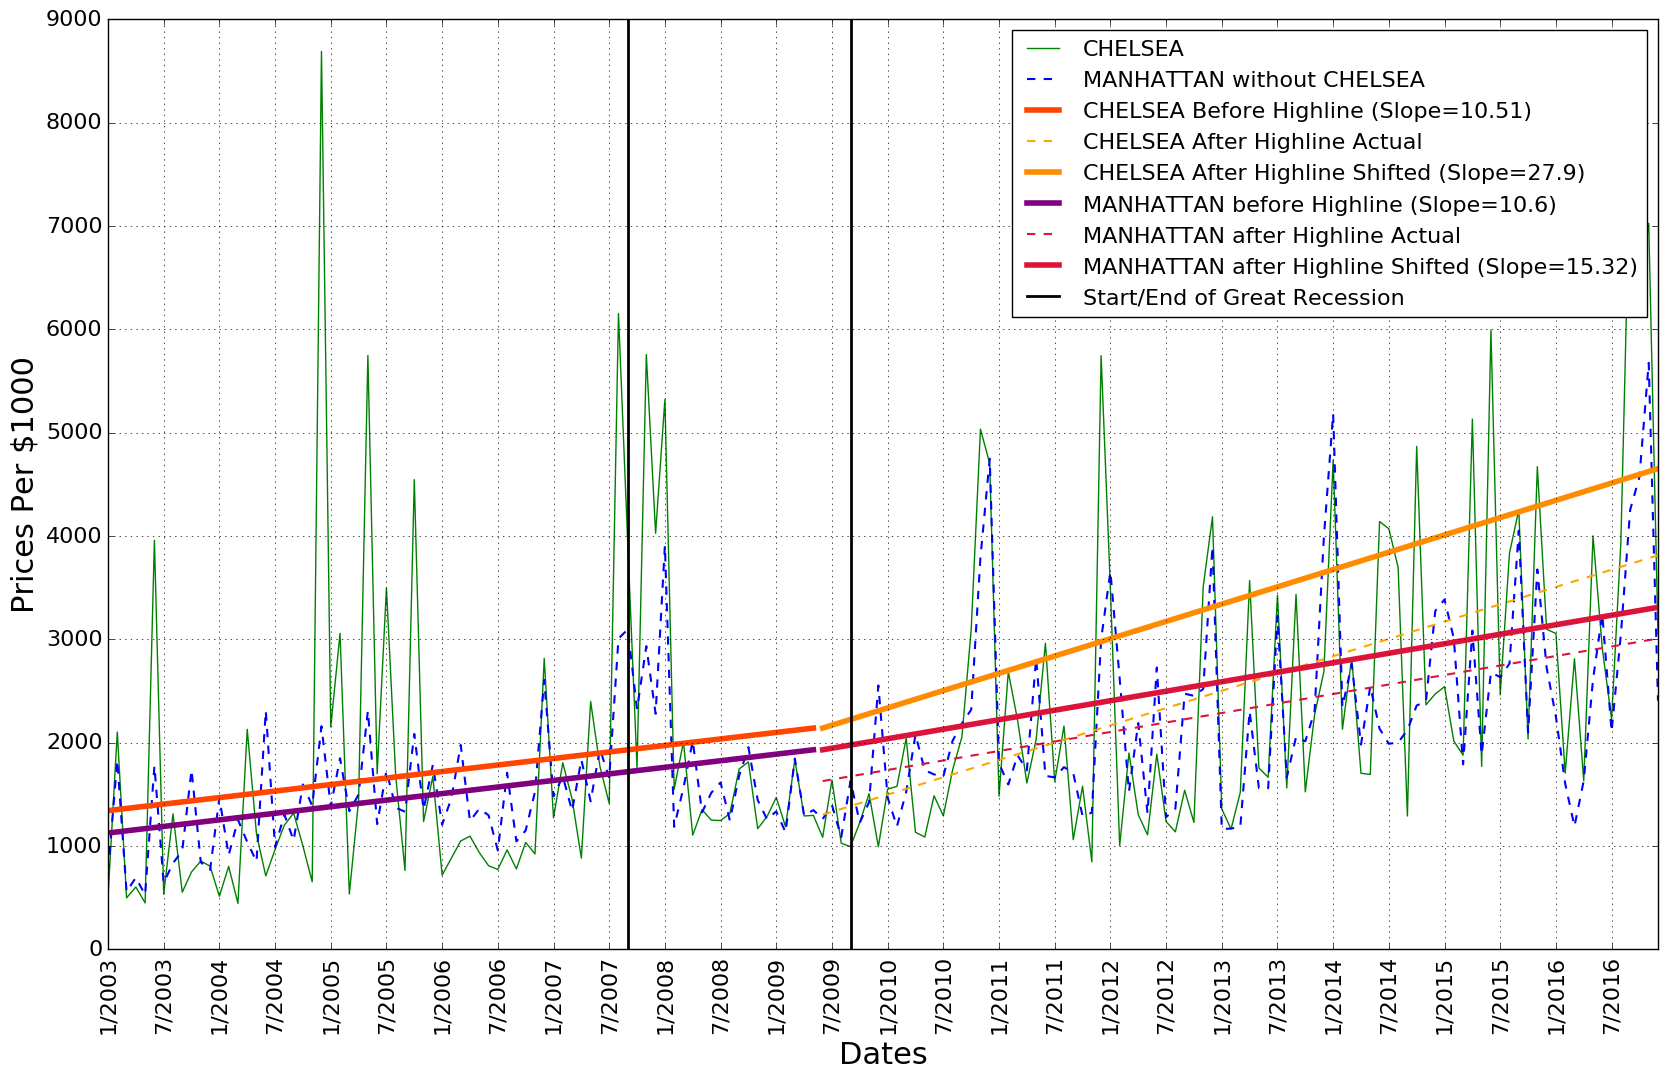

In [20]:
# Extracting trends Before and after opening the highline (6/2009)
a1, b1=polyfit(range(0, 77), highlinemean[:77], 1)
linreg1=polyval([a1, b1], range(0, 77))
a2, b2=polyfit(range(77, len(highlinemean)), highlinemean[77:], 1)
linreg2=polyval([a2, b2], range(77, len(highlinemean)))
a3, b3=polyfit(range(0, 77), manhattanmean[:77], 1)
linreg3=polyval([a3, b3], range(0, 77))
a4, b4=polyfit(range(77, len(manhattanmean)), manhattanmean[77:], 1)
linreg4=polyval([a4, b4], range(77, len(manhattanmean)))

diff =  min(linreg2) - max(linreg1)
diff2 = min(linreg4) - max(linreg3)

# Plotting Chelsea and everything else
fig, ax = plt.subplots(figsize=(20,12))
ax.set_xlabel('Dates', size = 22)
ax.set_ylabel('Prices Per $1000', size = 22)
tixtemplate = np.arange(0, 167, 6)
plt.xticks(tixtemplate, size = 16)
plt.yticks(size = 16)
ax.set_xticklabels(dates[::6], rotation=90)
ax.grid(True)
plot1 = ax.plot(highlinemean[:] , linewidth = 1, label = 'CHELSEA', color = "Green")
plot2 = ax.plot(manhattanmean[:], linewidth = 1.5, label = 'MANHATTAN without CHELSEA', ls = "--", color = "blue")
plot4 = ax.plot(linreg1, label = "CHELSEA Before Highline (Slope="+str(round(a1,2))+")", linewidth = 4, color = "Orangered")
plot9 = ax.plot(range(77, len(highlinemean)), linreg2, linewidth = 1.5,ls = "--", color = "orange",label = "CHELSEA After Highline Actual")
plot5 = ax.plot(range(77, len(highlinemean)), linreg2 -diff, label = "CHELSEA After Highline Shifted (Slope="+str(round(a2,2))+")",
                 linewidth = 4, color = "Darkorange")

plot6 = ax.plot(linreg3, label = "MANHATTAN before Highline (Slope="+str(round(a3,2))+")", linewidth = 4, 
               color = "Purple")
plot7 = ax.plot(range(77, len(manhattanmean)), linreg4, linewidth = 1.5, ls = "--", color = "crimson", label = "MANHATTAN after Highline Actual")
plot10 = ax.plot(range(77, len(manhattanmean)), linreg4 -diff2, label = "MANHATTAN after Highline Shifted (Slope="+str(round(a4,2))+")", linewidth = 4, 
               color = "Crimson")
plot8 = plt.axvline(x=56, linewidth=2, color='black' , label = "Start/End of Great Recession")
plot8 = plt.axvline(x=80, linewidth=2, color='black')
plot3 = plt.legend(fontsize = 16, loc = 1)

In [21]:
print a1,b1,a2,b2,a3,b3,a4,b4

10.509109166 1342.89224723 27.8978647576 -845.161396337 10.5967985114 1126.15263686 15.3181956531 449.449205897


## Median

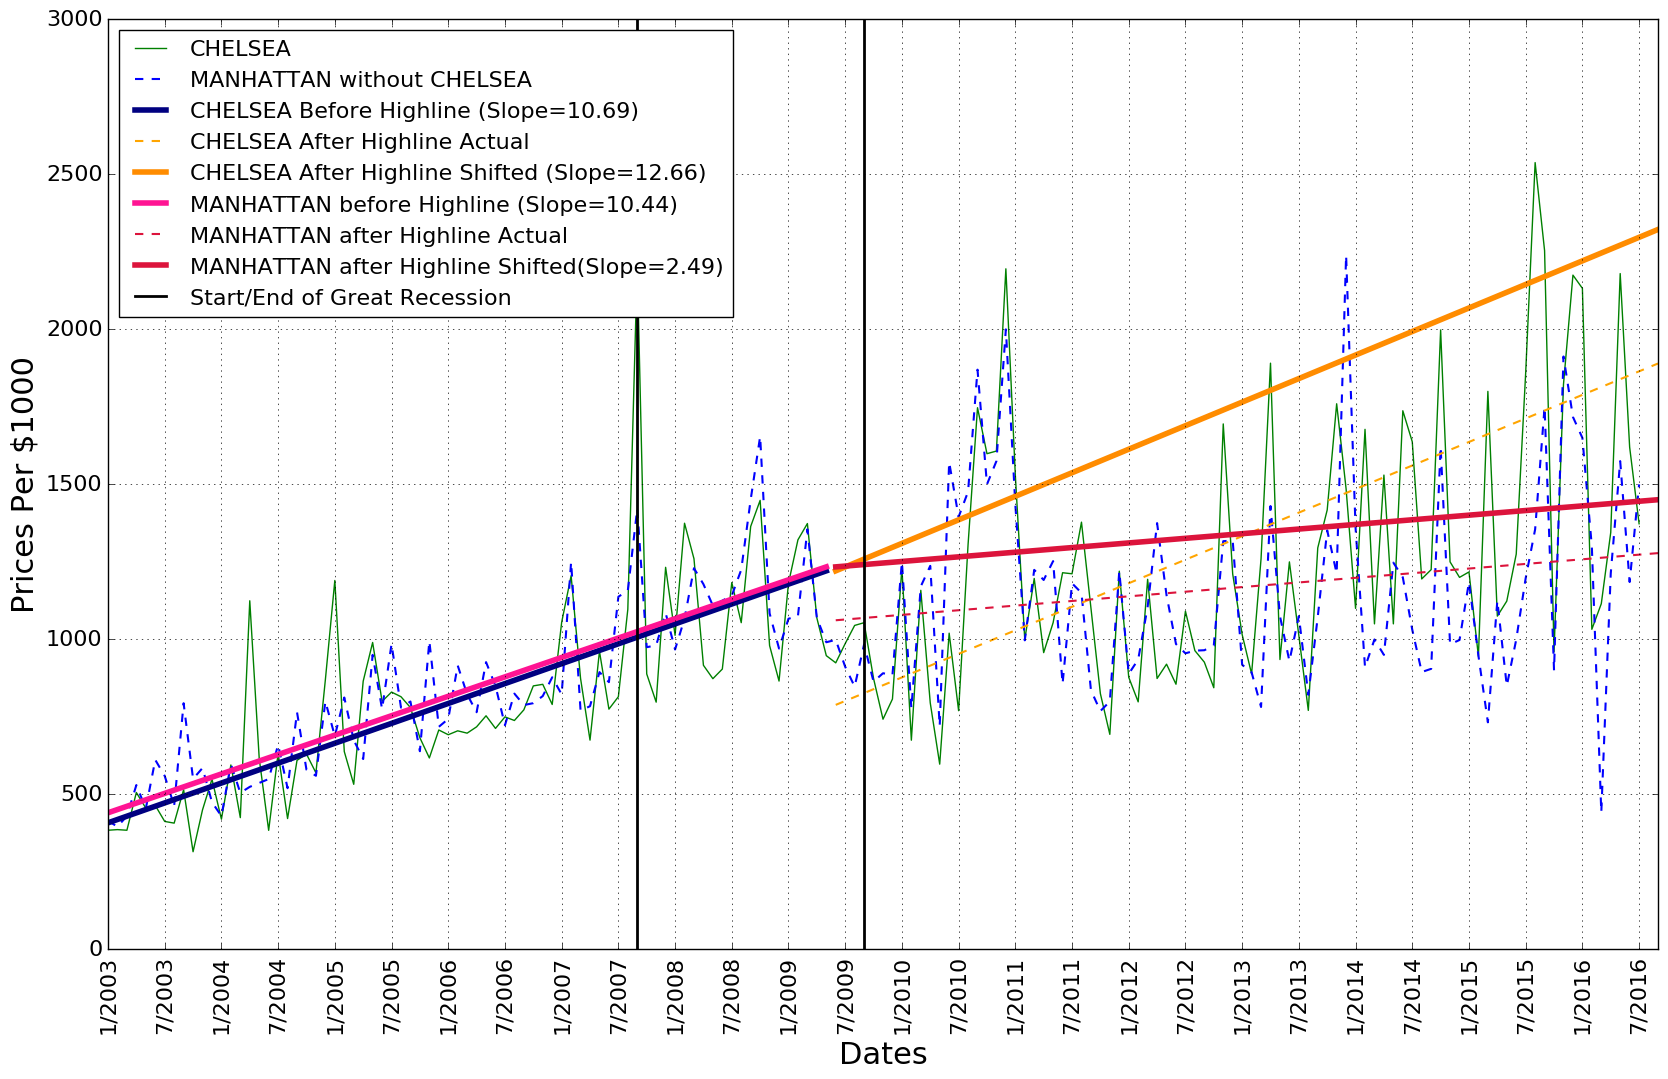

In [22]:
# Extracting trends Before and after opening the highline (6/2009)
a1, b1=polyfit(range(0, 77), highlinemedian[:77], 1)
linreg1=polyval([a1, b1], range(0, 77))
a2, b2=polyfit(range(77, 165), highlinemedian[77:165], 1)
linreg2=polyval([a2, b2], range(77, 165))
a3, b3=polyfit(range(0, 77), manhattanmedian[:77], 1)
linreg3=polyval([a3, b3], range(0, 77))
a4, b4=polyfit(range(77, 165), manhattanmedian[77:165], 1)
linreg4=polyval([a4, b4], range(77, 165))

diff =  min(linreg2) - max(linreg1)
diff2 = min(linreg4) - max(linreg3)

# Plotting Chelsea and everything else
fig, ax = plt.subplots(figsize=(20,12))
ax.set_xlabel('Dates', size = 22)
ax.set_ylabel('Prices Per $1000', size = 22)
tixtemplate = np.arange(0, 164, 6)
plt.xticks(tixtemplate, size = 16)
plt.yticks(size = 16)
ax.set_xticklabels(dates[::6], rotation=90)
ax.grid(True)

plot1 = ax.plot(highlinemedian[:163] , linewidth = 1, label = 'CHELSEA', color = "green")
plot2 = ax.plot(manhattanmedian[:163], linewidth = 1.5, label = 'MANHATTAN without CHELSEA', ls = "--", color = "blue")
plot4 = ax.plot(linreg1, label = "CHELSEA Before Highline (Slope="+str(round(a1,2))+")", linewidth = 4, color = "navy")
plot5_1 = ax.plot(range(77, 165), linreg2, linewidth = 1.5, ls="--", color = "orange" , label = "CHELSEA After Highline Actual")
plot5 = ax.plot(range(77, 165), linreg2 -diff, label = "CHELSEA After Highline Shifted (Slope="+str(round(a2,2))+")",
                 linewidth = 4, color = "Darkorange")
plot6 = ax.plot(linreg3, label = "MANHATTAN before Highline (Slope="+str(round(a3,2))+")", linewidth = 4, 
               color = "deeppink")
plot9 = ax.plot(range(77, 165), linreg4, linewidth = 1.5, ls="--", color = "crimson", label = "MANHATTAN after Highline Actual")
plot7 = ax.plot(range(77, 165), linreg4 - diff2, label = "MANHATTAN after Highline Shifted(Slope="+str(round(a4,2))+")", linewidth = 4, 
               color = "Crimson")

plot8 = plt.axvline(x=56, linewidth=2, color='black' , label = "Start/End of Great Recession")
plot10 = plt.axvline(x=80, linewidth=2, color='black')
plot3 = plt.legend(fontsize = 16, loc = 2)

In [23]:
print a1,b1,a2,b2,a3,b3,a4,b4

10.6945872286 408.242016484 12.6577957275 -185.946351075 10.437788593 440.62678022 2.48973573051 869.93239561


# Extrapolation

## Mean

In [24]:
# Fourier extrapolation
# Function to use fourier transform for predictions
def fourierExtrapolation(x, n_predict):
    n = len(x)
    # number of harmonics in model
    n_harm = 40                  
    t = np.arange(0, n)
    # find linear trend in x
    p = np.polyfit(t, x, 1)         
    # remove the trend
    x_notrend = x - p[0] * t        
    # x with no trend in frequency domain
    x_freqdom = np.fft.fft(x_notrend)  
    # calculating frequencies
    f = np.fft.fftfreq(n)              
    indexes = range(n)
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda z: np.absolute(f[z]))
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        # get amplitude
        ampli = np.absolute(x_freqdom[i]) / n   
        # get phase
        phase = np.angle(x_freqdom[i])          
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t    

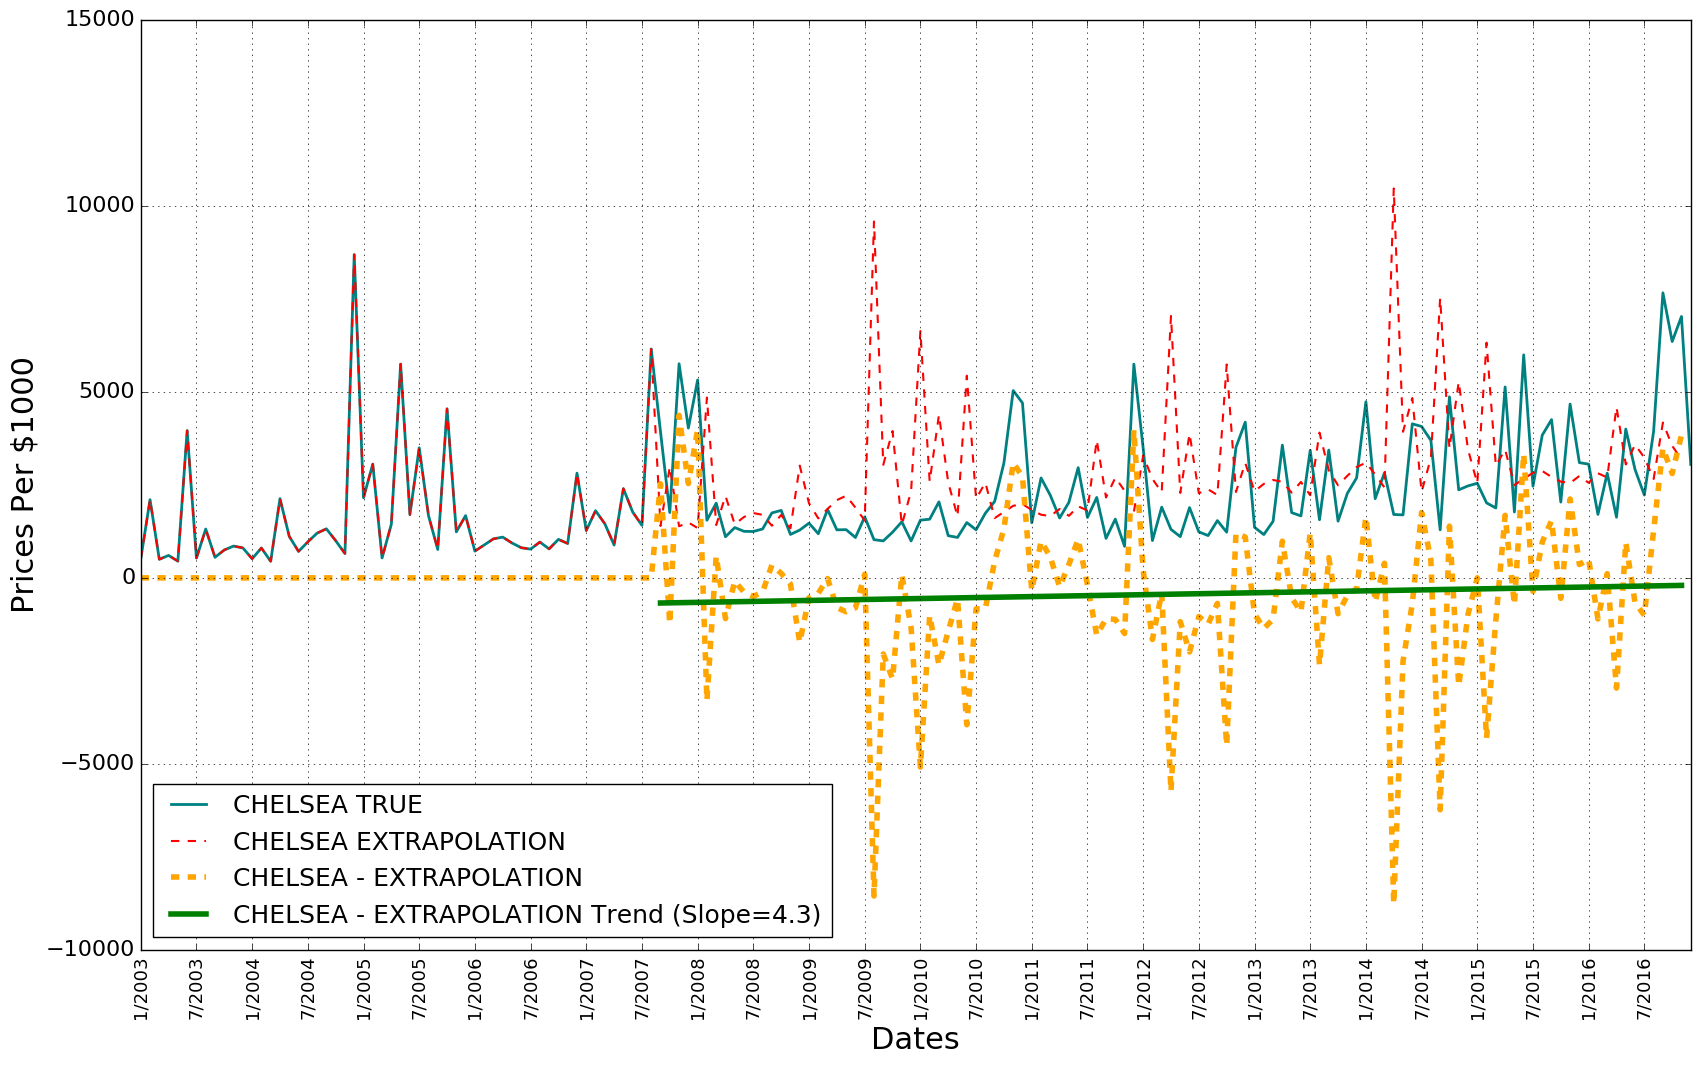

In [25]:
# Predicting through extrapolation
n_predict = 111
extrapolation = fourierExtrapolation(highlinemean[:56], n_predict)
difference = highlinemean[:167] - extrapolation[:167]
a1, b1=polyfit(range(56, 167), difference[56:], 1)
linreg1=polyval([a1, b1], range(56, 167))

# Plotting Chelsea extrapolated by Fourier
fig, ax = plt.subplots(figsize=(20,12))
ax.set_xlabel('Dates', size = 22)
ax.set_ylabel('Prices Per $1000', size = 22)
tixtemplate = np.arange(0, 167, 6)
plt.xticks(tixtemplate, size = 13)
plt.yticks(size = 16)
ax.set_xticklabels(dates[::6], rotation=90)
ax.grid(True)
plot1 = ax.plot(highlinemean[:] , linewidth = 2, label = 'CHELSEA TRUE', color = "Teal")
plot4 = ax.plot(range(0, 167), extrapolation[:], linewidth = 1.5, label = 'CHELSEA EXTRAPOLATION',
                ls = "--", color = "Red")
plot5 = ax.plot(range(0, 167), difference[:], linewidth = 4, label = 'CHELSEA - EXTRAPOLATION',
                ls = "--", color = "Orange")
plot6 = ax.plot(range(56, 167), linreg1, linewidth = 4, label = 'CHELSEA - EXTRAPOLATION Trend (Slope='+str(round(a1,2))+")",
                ls = "-", color = "Green")
plot3 = plt.legend(fontsize = 18, loc = 3)

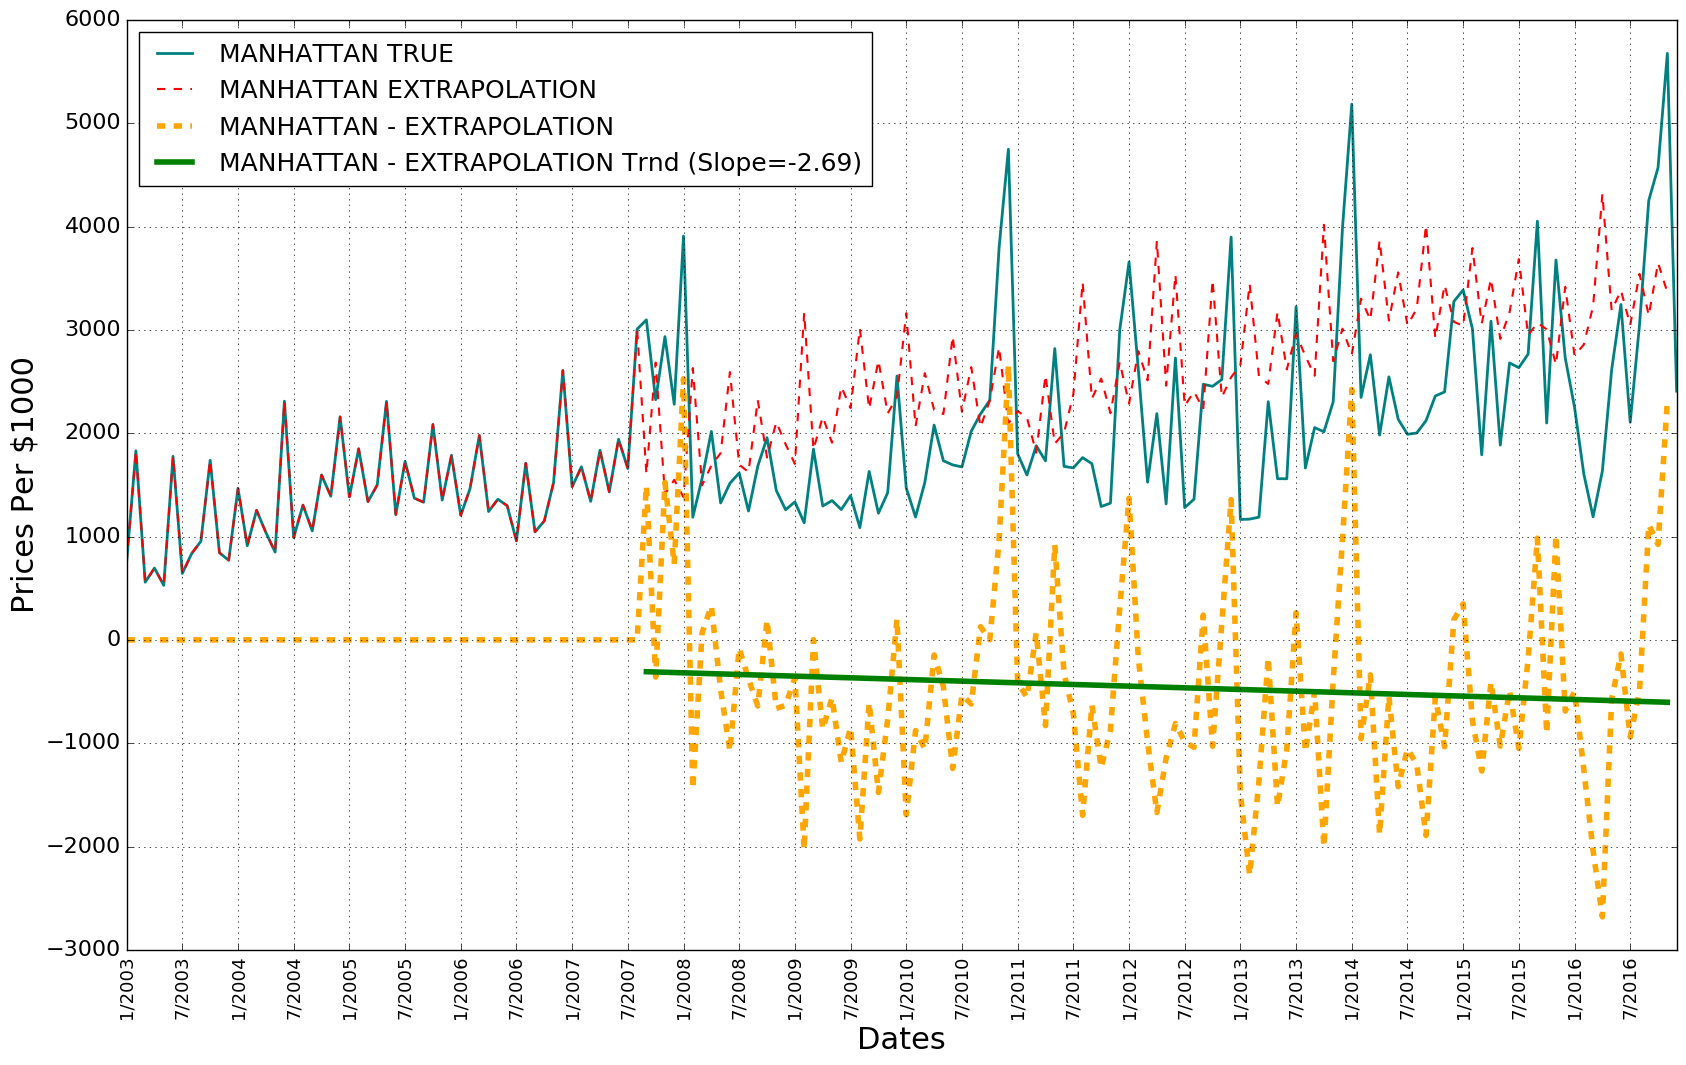

In [26]:
# Predicting through extrapolation
n_predict = 111
extrapolation = fourierExtrapolation(manhattanmean[:56], n_predict)
difference = manhattanmean[:167] - extrapolation[:167]
a1, b1=polyfit(range(56, 167), difference[56:], 1)
linreg1=polyval([a1, b1], range(56, 167))

# Plotting Chelsea extrapolated by Fourier
fig, ax = plt.subplots(figsize=(20,12))
ax.set_xlabel('Dates', size = 22)
ax.set_ylabel('Prices Per $1000', size = 22)
tixtemplate = np.arange(0, 167, 6)
plt.xticks(tixtemplate, size = 13)
plt.yticks(size = 16)
ax.set_xticklabels(dates[::6], rotation=90)
ax.grid(True)
plot1 = ax.plot(manhattanmean[:] , linewidth = 2, label = 'MANHATTAN TRUE', color = "Teal")
plot4 = ax.plot(range(0, 167), extrapolation[:], linewidth = 1.5, label = 'MANHATTAN EXTRAPOLATION',
                ls = "--", color = "Red")
plot5 = ax.plot(range(0, 167), difference[:], linewidth = 4, label = 'MANHATTAN - EXTRAPOLATION',
                ls = "--", color = "Orange")
plot6 = ax.plot(range(56, 167), linreg1, linewidth = 4, label = 'MANHATTAN - EXTRAPOLATION Trnd (Slope='+str(round(a1,2))+")",
                ls = "-", color = "Green")
plot3 = plt.legend(fontsize = 18, loc = 0)

In [27]:
(a1,b1)

(-2.6870457571953099, -157.56893333491465)

## Median

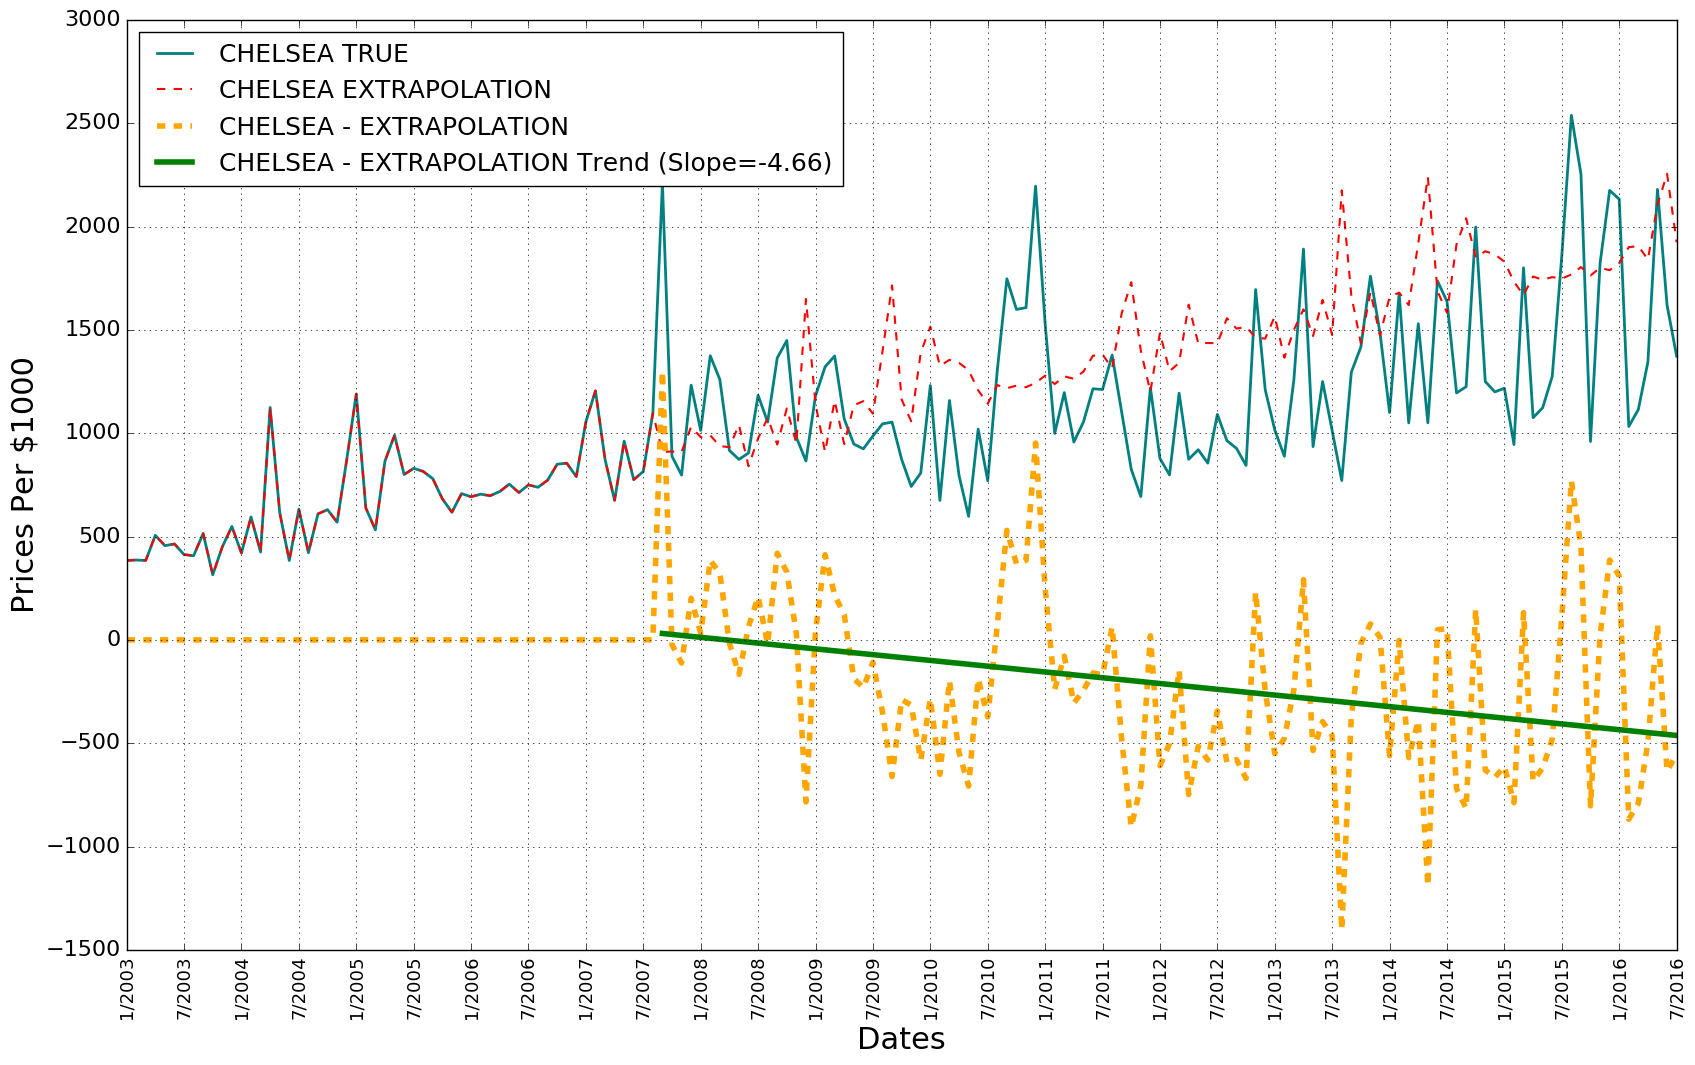

In [28]:
# Predicting through extrapolation
n_predict = 111
extrapolation = fourierExtrapolation(highlinemedian[:56], n_predict)
difference = highlinemedian[:163] - extrapolation[:163]
a1, b1=polyfit(range(56, 163), difference[56:], 1)
linreg1=polyval([a1, b1], range(56, 163))

# Plotting Chelsea extrapolated by Fourier
fig, ax = plt.subplots(figsize=(20,12))
ax.set_xlabel('Dates', size = 22)
ax.set_ylabel('Prices Per $1000', size = 22)
tixtemplate = np.arange(0, 163, 6)
plt.xticks(tixtemplate, size = 13)
plt.yticks(size = 16)
ax.set_xticklabels(dates[::6], rotation=90)
ax.grid(True)
plot1 = ax.plot(highlinemedian[:163] , linewidth = 2, label = 'CHELSEA TRUE', color = "Teal")
plot4 = ax.plot(range(0, 163), extrapolation[:163], linewidth = 1.5, label = 'CHELSEA EXTRAPOLATION',
                ls = "--", color = "Red")
plot5 = ax.plot(range(0, 163), difference[:163], linewidth = 4, label = 'CHELSEA - EXTRAPOLATION',
                ls = "--", color = "Orange")
plot6 = ax.plot(range(56, 163), linreg1, linewidth = 4, label = 'CHELSEA - EXTRAPOLATION Trend (Slope='+str(round(a1,2))+")",
                ls = "-", color = "Green")
plot3 = plt.legend(fontsize = 18, loc = 0)

In [29]:
a1,b1

(-4.6555371080900514, 291.61888681106069)

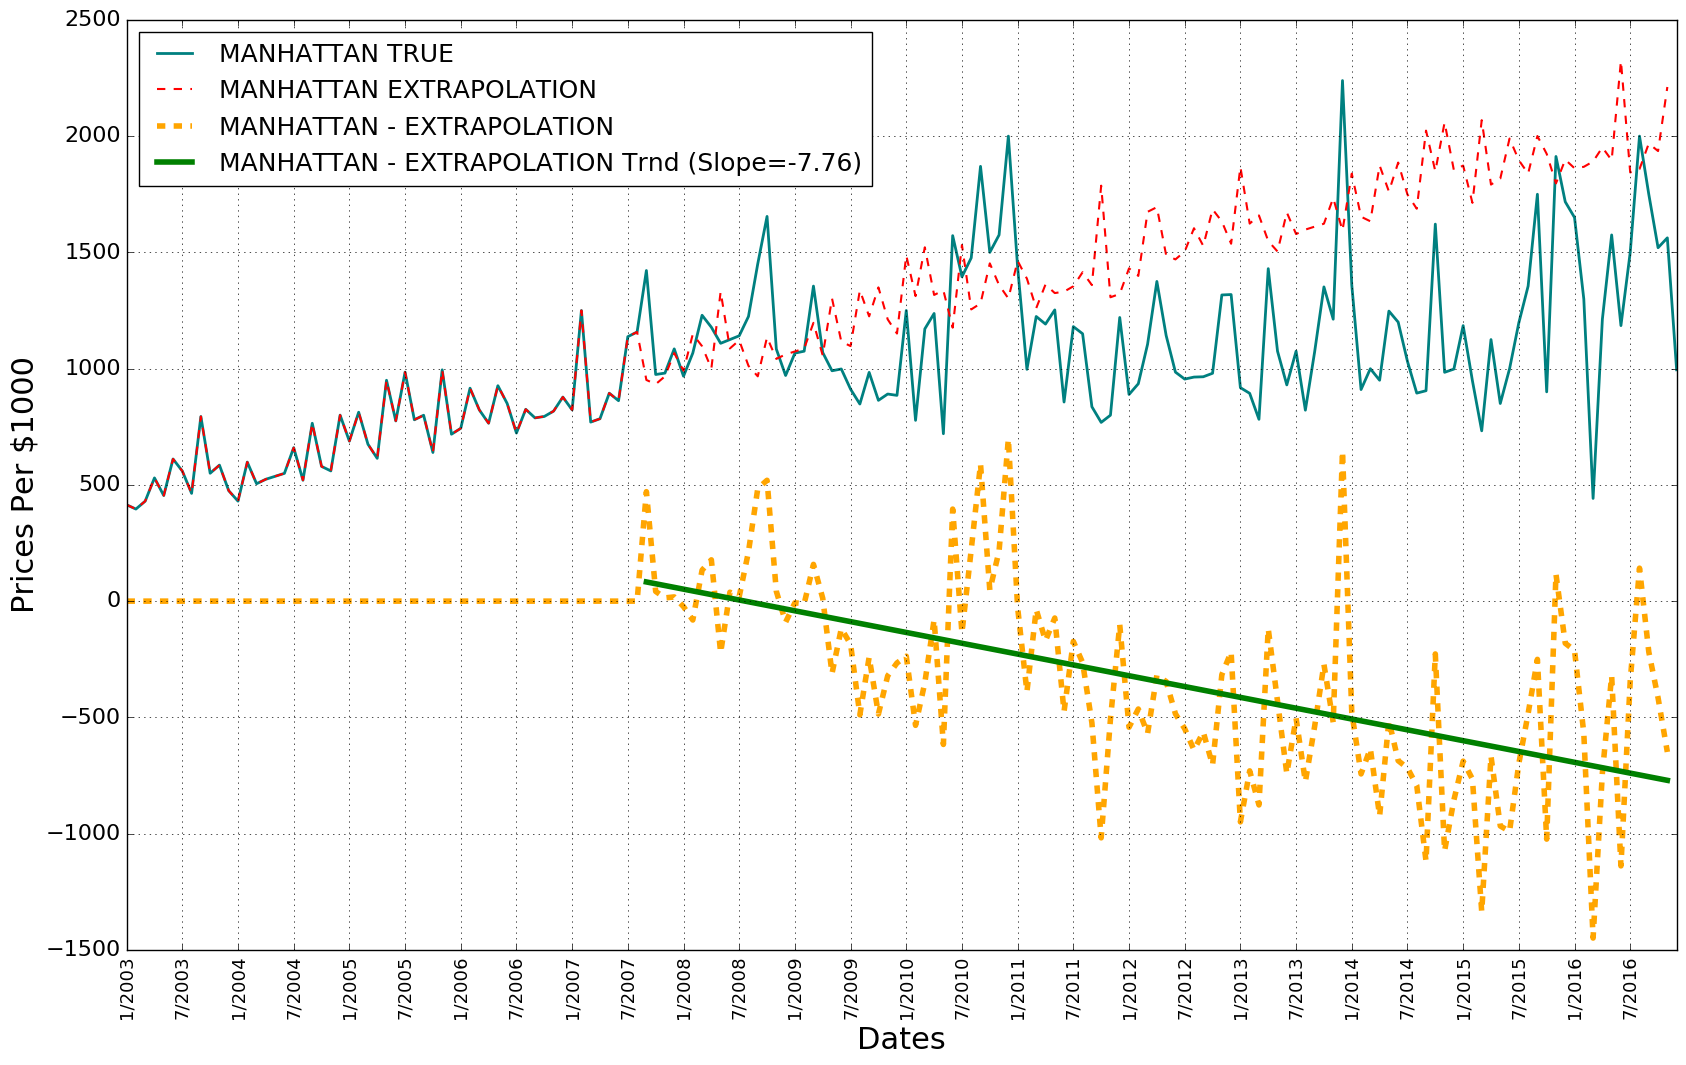

In [30]:
# Predicting through extrapolation
n_predict = 111
extrapolation = fourierExtrapolation(manhattanmedian[:56], n_predict)
difference = manhattanmedian[:167] - extrapolation[:167]
a1, b1=polyfit(range(56, 167), difference[56:], 1)
linreg1=polyval([a1, b1], range(56, 167))

# Plotting Chelsea extrapolated by Fourier
fig, ax = plt.subplots(figsize=(20,12))
ax.set_xlabel('Dates', size = 22)
ax.set_ylabel('Prices Per $1000', size = 22)
tixtemplate = np.arange(0, 167, 6)
plt.xticks(tixtemplate, size = 13)
plt.yticks(size = 16)
ax.set_xticklabels(dates[::6], rotation=90)
ax.grid(True)
plot1 = ax.plot(manhattanmedian[:] , linewidth = 2, label = 'MANHATTAN TRUE', color = "Teal")
plot4 = ax.plot(range(0, 167), extrapolation[:], linewidth = 1.5, label = 'MANHATTAN EXTRAPOLATION',
                ls = "--", color = "Red")
plot5 = ax.plot(range(0, 167), difference[:], linewidth = 4, label = 'MANHATTAN - EXTRAPOLATION',
                ls = "--", color = "Orange")
plot6 = ax.plot(range(56, 167), linreg1, linewidth = 4, label = 'MANHATTAN - EXTRAPOLATION Trnd (Slope='+str(round(a1,2))+")",
                ls = "-", color = "Green")
plot3 = plt.legend(fontsize = 18, loc = 0)

In [31]:
a1,b1

(-7.7571447811789929, 516.86138141822596)